# STILL WORKING ON THIS... estimated completion date 04/15/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Lectureslides.pdf*       out.csv                   'TEX file'/
 NumA_test_area.ipynb     pj002708111.py*            writeup.txt
 NumericalAnalysis.pdf*   project_description.pdf*
 NunA_work_area.ipynb     __pycache__/


In [3]:
import pj002708111 as pj

In [4]:
dir(pj)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adams_explicit4',
 'adams_pc4',
 'euler',
 'mod_euler',
 'np',
 'rk2',
 'rk4']

In [5]:
"""
test two: sytem of equtions
    y1' = -4y1 + 3y2 + 6
    y2' = -2.4y1 + 1.6y2 + 3.6
"""
def f(t,y):
    y1 = y[0]
    y2 = y[1]

    dy1 = -4 * y1 + 3 * y2 + 6
    dy2 = -2.4 * y1 + 1.6 * y2 + 3.6
    dy = np.array([dy1, dy2])

    return dy


def true_f(t):
    from numpy import exp
    
    yt1 = -3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5
    yt2 = -2.25*exp(-2*t) + 2.25*exp(-0.4*t)
    
    return (yt1, yt2)

In [6]:
method = pj.adams_pc4
name = "Adams 4th-Order Predictor-Corrector vs Actual"

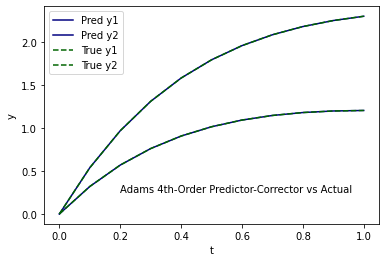

In [7]:
# implementing test two
a, b, N = 0, 1, 10
ya = np.array([0, 0])
t, y = method(f, a, b, ya, N)
y1, y2 = y[0,:], y[1,:]
# print(f't: {t}')
# print(f'y_1: {y1}')
# print(f'y_2: {y2}')

yt1, yt2 = true_f(t)
# print(f'yt_1: {yt1}')
# print(f'yt_2: {yt2}')

blue, ach = ['#4393c3'], ['#4d4d4d']
# plotting test two's numerical solution
plt.plot(t, y1, label='Pred y1', color='navy')
plt.plot(t, y2, label='Pred y2', color='navy')
plt.text(0.2,0.25,name)

# plotting the true solution to the second function
plt.plot(t, yt1, linestyle='--', label='True y1', color='darkgreen')
plt.plot(t, yt2, linestyle='--', label='True y2', color='darkgreen')
plt.ylabel('y')
plt.xlabel('t')
plt.legend()
plt.show()

In [8]:
# err1 = np.abs(yt1 - y1) # |y1 - y1*|
# err2 = np.abs(yt2 - y2)

In [9]:
# import pandas as pd
# tempdf = pd.DataFrame()
# tempdf['t'] = np.round(t,1)
# tempdf['y1_actual'] = np.round(yt1,4)
# tempdf['y2_actual'] = np.round(yt2,4)
# tempdf['y1_pc4'] = np.round(y1,4)
# tempdf['y2_pc4'] = np.round(y2,4)
# tempdf['y1_a - y1_pc4'] = np.round(err1,5)
# tempdf['y2_a - y2_pc4'] = np.round(err2,5)
# tempdf

In [10]:
# tempdf.to_csv('out.csv', sep='&', index=False)

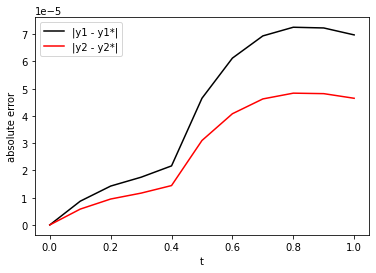

In [11]:
# visualizing errors
err1 = np.abs(yt1 - y1) # |y1 - y1*|
err2 = np.abs(yt2 - y2) # |y2 - y2*|
plt.plot(t, err1, label='|y1 - y1*|', color='black')
plt.plot(t, err2, label='|y2 - y2*|', color='red')
plt.xlabel('t')
plt.ylabel('absolute error')
plt.legend()
plt.show()